In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('Data/spam_ham_dataset.csv')

In [88]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [89]:
df = df.drop('Unnamed: 0',axis=1)

In [90]:
df.shape
df['label_num'].values

array([0, 0, 0, ..., 0, 0, 1])

In [91]:
df.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

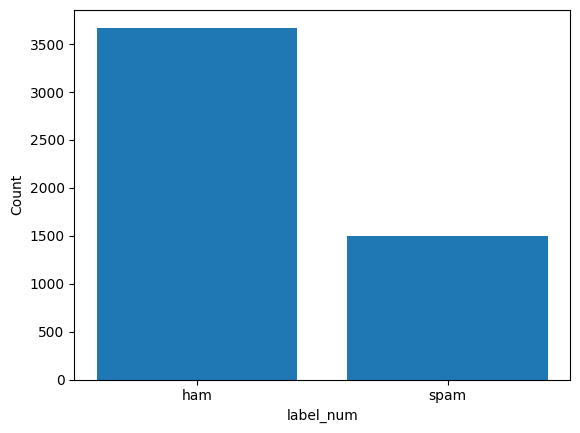

In [92]:
spam_ham_counts = df['label'].value_counts()
labels = spam_ham_counts.index
values = spam_ham_counts.values
plt.bar(labels, values)
plt.ylabel('Count')
plt.xlabel('label_num')
plt.savefig('Data/saved/spam_ham_image.png')
plt.show()

In [93]:
vectorizer = CountVectorizer()
data = vectorizer.fit_transform(df['text'])

In [94]:
data.shape


(5171, 50447)

In [95]:
X_train, X_test,y_train,y_test = train_test_split(data,df['label_num'].values,test_size=0.2,random_state=19)

In [96]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train,y_train)

MultinomialNB()

In [97]:
Y_pred_train = MNB.predict(X_train)

In [98]:
Y_pred_test = MNB.predict(X_test)

In [99]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score

In [100]:
accuracy_score(y_test , Y_pred_test)

0.9806763285024155

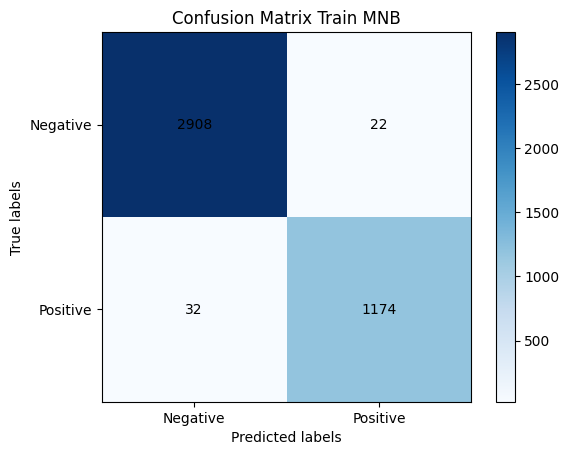

In [101]:
cm_test = confusion_matrix(y_test,Y_pred_test)
cm_train = confusion_matrix(y_train,Y_pred_train)
plt.imshow(cm_train, cmap='Blues', interpolation='nearest')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix Train MNB')
plt.colorbar()

# Thêm chú thích vào từng ô
for i in range(len(cm_train)):
    for j in range(len(cm_train[i])):
        plt.text(j, i, cm_train[i][j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục X
plt.yticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục Y
plt.savefig('Data/saved/cm_train_MNB.png')
plt.show()

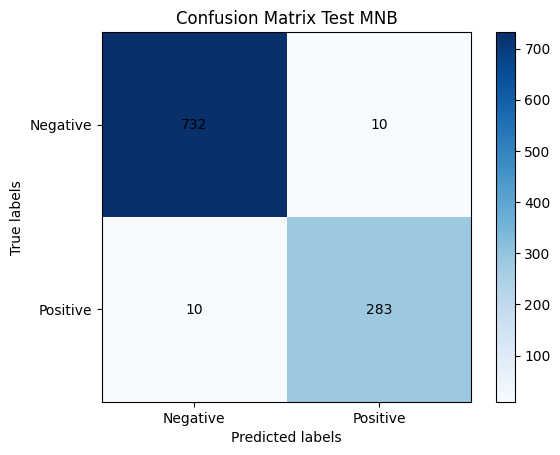

In [102]:
plt.imshow(cm_test, cmap='Blues', interpolation='nearest')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix Test MNB')
plt.colorbar()

# Thêm chú thích vào từng ô
for i in range(len(cm_test)):
    for j in range(len(cm_test[i])):
        plt.text(j, i, cm_test[i][j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục X
plt.yticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục Y
plt.savefig('Data/saved/cm_test_MNB.png')
plt.show()

In [103]:
print(classification_report(Y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



In [104]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(X_train,y_train)

/home/thangcn/anaconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
y_lreg_pred_train = lreg.predict(X_train)

In [106]:
y_lreg_pred_test = lreg.predict(X_test)

In [107]:
accuracy_score(y_lreg_pred_test,y_test)

0.9758454106280193

In [108]:
cm_train_lreg = confusion_matrix(y_train,y_lreg_pred_train)
cm_test_lreg = confusion_matrix(y_test,y_lreg_pred_test)

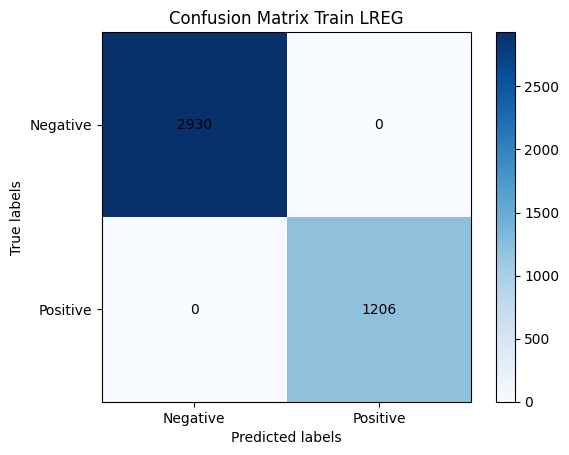

In [109]:
plt.imshow(cm_train_lreg, cmap='Blues', interpolation='nearest')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix Train LREG')
plt.colorbar()

# Thêm chú thích vào từng ô
for i in range(len(cm_train_lreg)):
    for j in range(len(cm_train_lreg[i])):
        plt.text(j, i, cm_train_lreg[i][j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục X
plt.yticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục Y
plt.savefig('Data/saved/cm_train_lreg.png')
plt.show()

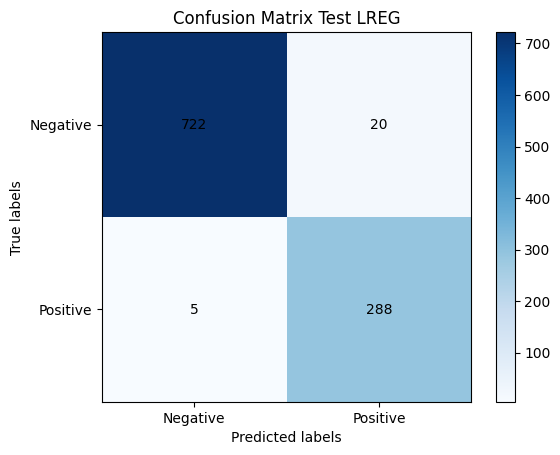

In [110]:
plt.imshow(cm_test_lreg, cmap='Blues', interpolation='nearest')

# Thêm tiêu đề và nhãn
plt.title('Confusion Matrix Test LREG')
plt.colorbar()

# Thêm chú thích vào từng ô
for i in range(len(cm_test_lreg)):
    for j in range(len(cm_test_lreg[i])):
        plt.text(j, i, cm_test_lreg[i][j], ha='center', va='center', color='black')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục X
plt.yticks([0, 1], ['Negative', 'Positive'])  # Nhãn của trục Y
plt.savefig('Data/saved/cm_test_lreg.png')
plt.show()

In [111]:
print(classification_report(y_lreg_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       727
           1       0.98      0.94      0.96       308

    accuracy                           0.98      1035
   macro avg       0.98      0.96      0.97      1035
weighted avg       0.98      0.98      0.98      1035

